In [1]:
import pandas as pd
import datetime
from os import listdir
import os, os.path
from os.path import isfile, join
import numpy as np
import csv
import re
import pandas as pd
import pm4py
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.log.exporter.xes import exporter as xes_exporter
from pm4py.objects.log.util import dataframe_utils

In [6]:
datos_raw = pd.read_excel("./grouped table of annotations.xlsx")
datos_raw=datos_raw.drop(['Unnamed: 0'], axis='columns')
glosario = pd.read_excel("./OperationCoding (solo cycle time).xlsx")
glosario['General operations'] = glosario['General operations'].fillna(method='pad')
glosario['Specific operations'] =  glosario['Specific operations'].str.split().str.join(' ')
glosario['General operations'] =  glosario['General operations'].str.split().str.join(' ')

columns=['case:id','case:concept:name','concept:name','Specific operation','time:timestamp','Question','Year']
#columna es el case_ID
cont = 0
df_prueba= pd.DataFrame(columns=columns)
ct=datetime.datetime.now()
for columna in datos_raw.columns:
    print("-----------------------------------------------------------------------")
    print("Case:id")
    print(columna)
    acciones_analisis=datos_raw[columna].dropna()
    for accion in acciones_analisis:
        
        accion = re.sub('[\xa0]', ' ', accion)
        print(' *************************** ', accion)
        string_dividido=accion.split(' ')
        accion = ' '.join(string_dividido)
        for fila in range(len(glosario)):
                     
            if(accion == glosario['Specific operations'][fila]):
                #print('si', accion)
                accionGeneral=glosario['General operations'][fila]
                accionEspecifica=accion
                columnaSeparada=columna.split()
                pregunta=columnaSeparada[1]
                año=columnaSeparada[3]
                ct=ct+datetime.timedelta(hours=1)
                print("Fecha:") 
                print(ct)
                new_row={'case:id':columna, 'case:concept:name':columna, 'concept:name':accionGeneral,'Specific operation':accionEspecifica,'time:timestamp':str(ct),'Question':pregunta,'Year':año} 
                #print(cont, new_row['case:concept:name'])
                cont = cont +1
                df_prueba = df_prueba.append(new_row, ignore_index=True)
                
            elif(accion == glosario['General operations'][fila]):
                #print('no', accion)
                accionGeneral=accion
                accionEspecifica=" "
                columnaSeparada=columna.split()
                pregunta=columnaSeparada[1]
                año=columnaSeparada[3]
                ct=ct+ datetime.timedelta(hours=1)
                print("Fecha:") 
                print(ct)
                new_row={'case:id':columna, 'case:concept:name':columna, 'concept:name':accionGeneral,'Specific operation':accionEspecifica,'time:timestamp':str(ct),'Question':pregunta,'Year':año} 
                #print(cont, new_row['case:concept:name'])
                cont = cont +1
                df_prueba = df_prueba.append(new_row, ignore_index=True)
            
                
            
df_prueba

-----------------------------------------------------------------------
Case:id
A1 P2 BPI 2020
 ***************************  Calculate cycle time of the whole process for all traces
Fecha:
2021-10-11 17:19:56.835674
 ***************************  Compare cycle time
Fecha:
2021-10-11 18:19:56.835674
-----------------------------------------------------------------------
Case:id
A2 P2 BPI 2020
 ***************************  Get cycle time from the previous question
Fecha:
2021-10-11 19:19:56.835674
 ***************************  Compare cycle time
Fecha:
2021-10-11 20:19:56.835674
-----------------------------------------------------------------------
Case:id
A7 P2 BPI 2020
 ***************************  Calculate throughput
Fecha:
2021-10-11 21:19:56.835674
 ***************************  Comparative of throughput
Fecha:
2021-10-11 22:19:56.835674
 ***************************  Comparative of throughput
Fecha:
2021-10-11 23:19:56.835674
 ***************************  Represent scatterplot
Fecha

 ***************************  Calculate cycle time of the whole process for a subset of traces
Fecha:
2021-10-14 07:19:56.835674
 ***************************  Represent heatmaps
Fecha:
2021-10-14 08:19:56.835674
 ***************************  Identify activities as bottlenecks applying temporal performance criteria
Fecha:
2021-10-14 09:19:56.835674
 ***************************  Preprocess the traces of the logs
Fecha:
2021-10-14 10:19:56.835674
 ***************************  Represent heatmaps
Fecha:
2021-10-14 11:19:56.835674
 ***************************  Calculate cycle time of the whole process for a subset of traces
Fecha:
2021-10-14 12:19:56.835674
 ***************************  Represent heatmaps
Fecha:
2021-10-14 13:19:56.835674
 ***************************  Preprocess the traces of the logs
Fecha:
2021-10-14 14:19:56.835674
 ***************************  Represent heatmaps
Fecha:
2021-10-14 15:19:56.835674
-----------------------------------------------------------------------
Case

Fecha:
2021-10-16 20:19:56.835674
 ***************************  Calculate number of activities
Fecha:
2021-10-16 21:19:56.835674
 ***************************  Calculate cycle time for all pairs of events for each subset of traces
Fecha:
2021-10-16 22:19:56.835674
 ***************************  Filter traces by activities
Fecha:
2021-10-16 23:19:56.835674
 ***************************  Calculate number of activities
Fecha:
2021-10-17 00:19:56.835674
 ***************************  Calculate cycle time for all pairs of events for each subset of traces
Fecha:
2021-10-17 01:19:56.835674
-----------------------------------------------------------------------
Case:id
A12 P6 BPI 2020
 ***************************  Calculate cycle time for all pairs of events for all traces
Fecha:
2021-10-17 02:19:56.835674
 ***************************  Identify activities as bottlenecks applying temporal performance criteria
Fecha:
2021-10-17 03:19:56.835674
--------------------------------------------------------

 ***************************  Calculate Statistics of throughput
Fecha:
2021-10-20 12:19:56.835674
-----------------------------------------------------------------------
Case:id
A10 P1 BPI 2020
 ***************************  Calculate cycle time of a fragment of the process for all traces
Fecha:
2021-10-20 13:19:56.835674
 ***************************  Represent histograms of cycle time
Fecha:
2021-10-20 14:19:56.835674
 ***************************  Represent boxplots of cycle time
Fecha:
2021-10-20 15:19:56.835674
 ***************************  Represent density of cycle time
Fecha:
2021-10-20 16:19:56.835674
-----------------------------------------------------------------------
Case:id
A12 P1 BPI 2020
 ***************************  Calculate processing time
Fecha:
2021-10-20 17:19:56.835674
 ***************************  Filter traces by activities
Fecha:
2021-10-20 18:19:56.835674
 ***************************  Represent process map with cycle time
Fecha:
2021-10-20 19:19:56.835674
----

Fecha:
2021-10-24 04:19:56.835674
 ***************************  Group traces by waiting
Fecha:
2021-10-24 05:19:56.835674
 ***************************  Calculate percentage of events
Fecha:
2021-10-24 06:19:56.835674
 ***************************  Calculate waiting time
Fecha:
2021-10-24 07:19:56.835674
 ***************************  Identify resources by activities
Fecha:
2021-10-24 08:19:56.835674
 ***************************  Calculate frequency of resources
Fecha:
2021-10-24 09:19:56.835674
 ***************************  Calculate waiting time
Fecha:
2021-10-24 10:19:56.835674
-----------------------------------------------------------------------
Case:id
A8 P1 BPI 2017
 ***************************  Filter traces by activities
Fecha:
2021-10-24 11:19:56.835674
 ***************************  Calculate waiting time
Fecha:
2021-10-24 12:19:56.835674
 ***************************  Represent bar charts of waiting time
Fecha:
2021-10-24 13:19:56.835674
 ***************************  Calculate 

 ***************************  Calculate frequency of activities
Fecha:
2021-10-27 17:19:56.835674
 ***************************  Calculate frequency of activities
Fecha:
2021-10-27 18:19:56.835674
 ***************************  Identify activities as bottlenecks applying temporal performance criteria
Fecha:
2021-10-27 19:19:56.835674
-----------------------------------------------------------------------
Case:id
A23 P1 BPI 2017
 ***************************  Group activities using clustering
Fecha:
2021-10-27 20:19:56.835674
 ***************************  Represent heatmaps
Fecha:
2021-10-27 21:19:56.835674
 ***************************  Represent process map with frequency
Fecha:
2021-10-27 22:19:56.835674
 ***************************  Calculate cycle time of only a subset of pairs of events for a subset of traces
Fecha:
2021-10-27 23:19:56.835674
 ***************************  Identify activities as bottlenecks applying temporal performance criteria
Fecha:
2021-10-28 00:19:56.835674
------

 ***************************  Filter traces by attributes
Fecha:
2021-10-31 13:19:56.835674
 ***************************  Calculate number of traces
Fecha:
2021-10-31 14:19:56.835674
 ***************************  Calculate Statistics of attributes
Fecha:
2021-10-31 15:19:56.835674
 ***************************  Represent bar charts of cycle time
Fecha:
2021-10-31 16:19:56.835674
 ***************************  Represent temporal series of subprocesses
Fecha:
2021-10-31 17:19:56.835674
 ***************************  Represent bar charts of waiting time
Fecha:
2021-10-31 18:19:56.835674
 ***************************  Calculate Statistics of attributes
Fecha:
2021-10-31 19:19:56.835674
 ***************************  Filter traces by attributes
Fecha:
2021-10-31 20:19:56.835674
 ***************************  Group traces depending on attributes
Fecha:
2021-10-31 21:19:56.835674
 ***************************  Calculate number of variants
Fecha:
2021-10-31 22:19:56.835674
 **************************

 ***************************  Calculate cycle time of a fragment of the process for a subset of traces
Fecha:
2021-11-04 09:19:56.835674
 ***************************  Filter traces by cycle time
Fecha:
2021-11-04 10:19:56.835674
 ***************************  Identify resources by cycle time
Fecha:
2021-11-04 11:19:56.835674
 ***************************  Calculate number of traces
Fecha:
2021-11-04 12:19:56.835674
 ***************************  Represent process map with frequency
Fecha:
2021-11-04 13:19:56.835674
 ***************************  Represent process map with cycle time
Fecha:
2021-11-04 14:19:56.835674
 ***************************  Calculate number of traces
Fecha:
2021-11-04 15:19:56.835674
 ***************************  Represent histograms of cycle time
Fecha:
2021-11-04 16:19:56.835674
 ***************************  Calculate cycle time of a fragment of the process for a subset of traces
Fecha:
2021-11-04 17:19:56.835674
 ***************************  Identify activities as 

Fecha:
2021-11-08 06:19:56.835674
 ***************************  Represent bar charts of sub-processes
Fecha:
2021-11-08 07:19:56.835674
 ***************************  Identify attributes by cycle time
Fecha:
2021-11-08 08:19:56.835674
 ***************************  Calculate cycle time for all pairs of events for a subset of traces
Fecha:
2021-11-08 09:19:56.835674
 ***************************  Identify attributes by cycle time
Fecha:
2021-11-08 10:19:56.835674
 ***************************  Identify organizational units as bottlenecks applying temporal performance criteria
Fecha:
2021-11-08 11:19:56.835674
 ***************************  Calculate number of sub-processes
Fecha:
2021-11-08 12:19:56.835674
 ***************************  Calculate percentage of sub-processes
Fecha:
2021-11-08 13:19:56.835674
 ***************************  Represent lineal distribution of an attribute by traces
Fecha:
2021-11-08 14:19:56.835674
 ***************************  Represent scatterplot
Fecha:
2021-11-0

 ***************************  Identify organizational units by traces
Fecha:
2021-11-12 04:19:56.835674
 ***************************  Identify organizational units by traces
Fecha:
2021-11-12 05:19:56.835674
 ***************************  Filter traces by year
Fecha:
2021-11-12 06:19:56.835674
 ***************************  Group traces by resources
Fecha:
2021-11-12 07:19:56.835674
 ***************************  Identify resources by activities
Fecha:
2021-11-12 08:19:56.835674
 ***************************  Calculate percentage of activities
Fecha:
2021-11-12 09:19:56.835674
-----------------------------------------------------------------------
Case:id
A5 P5 BPI 2015
 ***************************  Filter traces by activities
Fecha:
2021-11-12 10:19:56.835674
 ***************************  Calculate cycle time of the whole process for all traces
Fecha:
2021-11-12 11:19:56.835674
 ***************************  Calculate Statistics of cycle time
Fecha:
2021-11-12 12:19:56.835674
 ************

 ***************************  Calculate cycle time of the whole process for each subset of traces
Fecha:
2021-11-16 01:19:56.835674
 ***************************  Identify attributes by cycle time
Fecha:
2021-11-16 02:19:56.835674
 ***************************  Represent bar charts of cycle time
Fecha:
2021-11-16 03:19:56.835674
-----------------------------------------------------------------------
Case:id
A30 P1 BPI 2020
 ***************************  Filter traces by activities
Fecha:
2021-11-16 04:19:56.835674
 ***************************  Calculate percentage of traces
Fecha:
2021-11-16 05:19:56.835674
 ***************************  Preprocess the traces of the logs
Fecha:
2021-11-16 06:19:56.835674
 ***************************  Filter traces by activities
Fecha:
2021-11-16 07:19:56.835674
 ***************************  Represent temporal series of traces
Fecha:
2021-11-16 08:19:56.835674
 ***************************  Represent temporal series of traces
Fecha:
2021-11-16 09:19:56.83567

 ***************************  Represent temporal series of traces
Fecha:
2021-11-19 21:19:56.835674
 ***************************  Filter events by activities
Fecha:
2021-11-19 22:19:56.835674
 ***************************  Represent temporal series of activities
Fecha:
2021-11-19 23:19:56.835674
 ***************************  Group traces by year
Fecha:
2021-11-20 00:19:56.835674
 ***************************  Group traces by activities
Fecha:
2021-11-20 01:19:56.835674
 ***************************  Calculate Statistics of activities
Fecha:
2021-11-20 02:19:56.835674
 ***************************  Calculate throughput
Fecha:
2021-11-20 03:19:56.835674
 ***************************  Represent temporal series of throughput
Fecha:
2021-11-20 04:19:56.835674


,case:id,case:concept:name,concept:name,Specific operation,time:timestamp,Question,Year
0,A1 P2 BPI 2020,A1 P2 BPI 2020,Calculate cycle time,Calculate cycle time of the whole process for ...,2021-10-11 17:19:56.835674,P2,2020
1,A1 P2 BPI 2020,A1 P2 BPI 2020,Compare cycle time,,2021-10-11 18:19:56.835674,P2,2020
2,A2 P2 BPI 2020,A2 P2 BPI 2020,Calculate cycle time,Get cycle time from the previous question,2021-10-11 19:19:56.835674,P2,2020
3,A2 P2 BPI 2020,A2 P2 BPI 2020,Compare cycle time,,2021-10-11 20:19:56.835674,P2,2020
4,A7 P2 BPI 2020,A7 P2 BPI 2020,Calculate throughput,,2021-10-11 21:19:56.835674,P2,2020
...,...,...,...,...,...,...,...
943,A19 P1 BPI 2020,A19 P1 BPI 2020,Group traces,Group traces by year,2021-11-20 00:19:56.835674,P1,2020
944,A19 P1 BPI 2020,A19 P1 BPI 2020,Group traces,Group traces by activities,2021-11-20 01:19:56.835674,P1,2020
945,A19 P1 BPI 2020,A19 P1 BPI 2020,Calculate statistics,Calculate Statistics of activities,2021-11-20 02:19:56.835674,P1,2020
946,A19 P1 BPI 2020,A19 P1 BPI 2020,Calculate throughput,,2021-11-20 03:19:56.835674,P1,2020


In [7]:
df_prueba

,case:id,case:concept:name,concept:name,Specific operation,time:timestamp,Question,Year
0,A1 P2 BPI 2020,A1 P2 BPI 2020,Calculate cycle time,Calculate cycle time of the whole process for ...,2021-10-11 17:19:56.835674,P2,2020
1,A1 P2 BPI 2020,A1 P2 BPI 2020,Compare cycle time,,2021-10-11 18:19:56.835674,P2,2020
2,A2 P2 BPI 2020,A2 P2 BPI 2020,Calculate cycle time,Get cycle time from the previous question,2021-10-11 19:19:56.835674,P2,2020
3,A2 P2 BPI 2020,A2 P2 BPI 2020,Compare cycle time,,2021-10-11 20:19:56.835674,P2,2020
4,A7 P2 BPI 2020,A7 P2 BPI 2020,Calculate throughput,,2021-10-11 21:19:56.835674,P2,2020
...,...,...,...,...,...,...,...
943,A19 P1 BPI 2020,A19 P1 BPI 2020,Group traces,Group traces by year,2021-11-20 00:19:56.835674,P1,2020
944,A19 P1 BPI 2020,A19 P1 BPI 2020,Group traces,Group traces by activities,2021-11-20 01:19:56.835674,P1,2020
945,A19 P1 BPI 2020,A19 P1 BPI 2020,Calculate statistics,Calculate Statistics of activities,2021-11-20 02:19:56.835674,P1,2020
946,A19 P1 BPI 2020,A19 P1 BPI 2020,Calculate throughput,,2021-11-20 03:19:56.835674,P1,2020


In [8]:
type(df_prueba.iloc[2]['time:timestamp'])

str

In [9]:
for i in range(len(df_prueba)):   
    df_prueba.iloc[i]['time:timestamp'] = datetime.datetime.strptime(df_prueba.iloc[i]['time:timestamp'], '%Y-%m-%d %H:%M:%S.%f')

In [10]:
type(df_prueba.iloc[2]['time:timestamp'])

datetime.datetime

In [11]:
log = log_converter.apply(df_prueba)
xes_exporter.apply(log, './Log of analysis of time spects.xes')

In [6]:
log2=xes_importer.apply('./Log of analysis of time spects.xes')
log2_df= log_converter.apply(log2,variant=log_converter.Variants.TO_DATA_FRAME)

In [11]:
log2_df=log2_df.rename({'concept:name': 'General operation', 'Specific operation': 'concept:name'},axis='columns')

In [12]:
log2_df

,General operation,concept:name,time:timestamp,Question,Year,case:id,case:concept:name
0,Calculate cycle time,Calculate cycle time of the whole process for ...,2021-10-13 12:57:26.198786,P2,2020,A1 P2 BPI 2020,A1 P2 BPI 2020
1,Compare cycle time,,2021-10-13 13:57:26.198786,P2,2020,A1 P2 BPI 2020,A1 P2 BPI 2020
2,Calculate cycle time,Get cycle time from the previous question,2021-10-13 14:57:26.198786,P2,2020,A2 P2 BPI 2020,A2 P2 BPI 2020
3,Compare cycle time,,2021-10-13 15:57:26.198786,P2,2020,A2 P2 BPI 2020,A2 P2 BPI 2020
4,Calculate throughput,,2021-10-13 16:57:26.198786,P2,2020,A7 P2 BPI 2020,A7 P2 BPI 2020
...,...,...,...,...,...,...,...
943,Group traces,Group traces by year,2021-11-21 19:57:26.198786,P1,2020,A19 P1 BPI 2020,A19 P1 BPI 2020
944,Group traces,Group traces by activities,2021-11-21 20:57:26.198786,P1,2020,A19 P1 BPI 2020,A19 P1 BPI 2020
945,Calculate statistics,Calculate Statistics of activities,2021-11-21 21:57:26.198786,P1,2020,A19 P1 BPI 2020,A19 P1 BPI 2020
946,Calculate throughput,,2021-11-21 22:57:26.198786,P1,2020,A19 P1 BPI 2020,A19 P1 BPI 2020


In [13]:
log2 = log_converter.apply(log2_df)
xes_exporter.apply(log2, './Log of analysis of specific time aspects.xes')

In [17]:
df_categorias_autores=pd.read_csv("Log CT.csv",index_col=0)
df_categorias_autores

,case:concept:name,concept:name,Specific operation,time:timestamp,Report,Question,Year,Category
0,A1 P2 BPI 2020,Calculate cycle time,Calculate cycle time of the whole process for ...,2021-10-19 12:47:13.651481,A1,P2,2020,Academic
1,A1 P2 BPI 2020,Compare cycle time,,2021-10-19 12:47:13.659459,A1,P2,2020,Academic
2,A2 P2 BPI 2020,Calculate cycle time,Get cycle time from the previous question,2021-10-19 12:47:13.666495,A2,P2,2020,Student
3,A2 P2 BPI 2020,Compare cycle time,,2021-10-19 12:47:13.666495,A2,P2,2020,Student
4,A7 P2 BPI 2020,Calculate throughput,,2021-10-19 12:47:13.682150,A7,P2,2020,Academic
...,...,...,...,...,...,...,...,...
943,A19 P1 BPI 2020,Group traces,Group traces by year,2021-10-19 12:47:20.534786,A19,P1,2020,Professional
944,A19 P1 BPI 2020,Group traces,Group traces by activities,2021-10-19 12:47:20.534786,A19,P1,2020,Professional
945,A19 P1 BPI 2020,Calculate statistics,Calculate Statistics of activities,2021-10-19 12:47:20.557196,A19,P1,2020,Professional
946,A19 P1 BPI 2020,Calculate throughput,,2021-10-19 12:47:20.567144,A19,P1,2020,Professional


In [38]:
cycleTimeOperations=["Calculate cycle time","Identify bottlenecks","Compare cycle time", "Calculate waiting time",
                     "Calculate throughput","Calculate processing time", "Compare waiting time with processing time", 
                     "Analyze cycle time depending on the events",
                     "Calculate intervals of time of the traces",
                     'Comparative of throughput','Compare processing time',]

In [39]:
manipulationOperations=[
    "Filter traces","Group traces", "Group activities","Preprocess the traces of the logs", "Filter activities",
    "Filter events","Preprocess the events of the logs", "Group organizational units", "Group events by time",
    "Filter variants depending on frequency", 'Group events by attributes','Group sub-processes', 'Filter sub-processes'
]

In [40]:
statisticOperations=[
    "Calculate number of elements", "Calculate percentages","Calculate frequency", "Calculate statistics",
    "Calculate average of activities per trace"
]

In [41]:
representationOperations=[
    "Represent process map", "Represent histograms", "Represent bar charts", "Represent scatter plot",
    "Represent heat maps", "Represent circular charts of attributes of the traces","Represent box plots of cycle time", 
    "Represent temporal series of sub-processes", "Represent density of cycle time","Discover and Replay a Log on Petri Net",
    "Represent temporal series", 'Represent boxplots of cycle time','Represent correlation graph of variables',
    'Represent heatmaps', 'Represent lineal distribution of an attribute by traces', 'Represent linear tendency of cycle time',
    'Represent scatterplot'
]

In [42]:
identificationOperations=[
    "Identify roles", "Identify resources", "Identify values of attributes", "Identify dates", 
    "Identify specific sub-processes", "Identify impact of bottlenecks by organizational unit",
    "Identify activity with biggest backlog","Identify attributes", 'Identify activities',
    'Identify attributes','Identify organizational units', 'Identify specific subprocesses',
    'Identify traces by cycle time','Identify transitions by cycle time',
]

In [51]:
otherOperations=[
    "Assign resource to each activity", "Apply machine learning techniques", "Apply decision trees",
    "Discover happy path of the process",'Discover process maps','Calculate dates of the development of activities of resources'
]

In [54]:
listTypesOperations=[]
listOthers=[]
for index, row in df_categorias_autores.iterrows():
    if row['concept:name'] in cycleTimeOperations:
        listTypesOperations.append("Analyze Cycle Time")
    elif row['concept:name'] in manipulationOperations:
        listTypesOperations.append("Manipulation")
    elif row['concept:name'] in statisticOperations:
        listTypesOperations.append("Calculate statistics")
    elif row['concept:name'] in representationOperations:
        listTypesOperations.append("Representation")
    elif row['concept:name'] in identificationOperations:
        listTypesOperations.append("Identification")
    else:
        listTypesOperations.append("Others")

In [55]:
df_categorias_autores['Type']=listTypesOperations

In [56]:
df_categorias_autores

,case:concept:name,concept:name,Specific operation,time:timestamp,Report,Question,Year,Category,Type
0,A1 P2 BPI 2020,Calculate cycle time,Calculate cycle time of the whole process for ...,2021-10-19 12:47:13.651481,A1,P2,2020,Academic,Analyze Cycle Time
1,A1 P2 BPI 2020,Compare cycle time,,2021-10-19 12:47:13.659459,A1,P2,2020,Academic,Analyze Cycle Time
2,A2 P2 BPI 2020,Calculate cycle time,Get cycle time from the previous question,2021-10-19 12:47:13.666495,A2,P2,2020,Student,Analyze Cycle Time
3,A2 P2 BPI 2020,Compare cycle time,,2021-10-19 12:47:13.666495,A2,P2,2020,Student,Analyze Cycle Time
4,A7 P2 BPI 2020,Calculate throughput,,2021-10-19 12:47:13.682150,A7,P2,2020,Academic,Analyze Cycle Time
...,...,...,...,...,...,...,...,...,...
943,A19 P1 BPI 2020,Group traces,Group traces by year,2021-10-19 12:47:20.534786,A19,P1,2020,Professional,Manipulation
944,A19 P1 BPI 2020,Group traces,Group traces by activities,2021-10-19 12:47:20.534786,A19,P1,2020,Professional,Manipulation
945,A19 P1 BPI 2020,Calculate statistics,Calculate Statistics of activities,2021-10-19 12:47:20.557196,A19,P1,2020,Professional,Calculate statistics
946,A19 P1 BPI 2020,Calculate throughput,,2021-10-19 12:47:20.567144,A19,P1,2020,Professional,Analyze Cycle Time


In [76]:
tipos_op_agrupado_años=df_categorias_autores.groupby("Year")['Type'].value_counts()

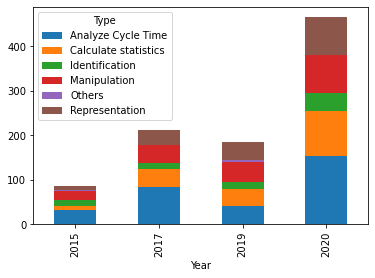

In [81]:
tipos_op_agrupado_años.unstack().plot(kind='bar', stacked=True)

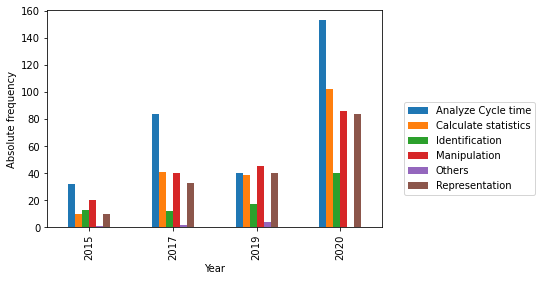

In [89]:
import matplotlib.pyplot as plt
tipos_op_agrupado_años.unstack().plot(kind='bar')
plt.legend(["Analyze Cycle time","Calculate statistics","Identification","Manipulation","Others","Representation"],bbox_to_anchor = (1.05, 0.6))
plt.ylabel("Absolute frequency")
plt.show()